## seaborn

In [9]:
import anndata as ad
import numpy as np

In [10]:
import sys
import os

# Define the path to the main folder
main_folder = "/Users/apple/Desktop/KB/SCSeq_LineageBarcoding2/SCSeq_LineageBarcoding/SCLineage_ConstrativeLearning/main_semi"

# Add it to sys.path
sys.path.append(main_folder)

import LCL_eval

In [11]:
import os
import numpy as np
import anndata as ad
import pandas as pd

# — adjust these two paths to your local setup —
INPUT_DIR = "/Users/apple/Desktop/KB/data/feat_LCL_2025/Larry_top200/feat_semi_sup_grid_search"
TRAIN_ADATA = ad.read_h5ad('/Users/apple/Desktop/KB/data/LarryData/train_test/Larry_200_train.h5ad')
TEST_ADATA  = ad.read_h5ad('/Users/apple/Desktop/KB/data/LarryData/train_test/Larry_200_test.h5ad')


In [12]:
TRAIN_ADATA.obs

,Library,Cell barcode,time_info,Starting population,state_info,Well,SPRING-x,SPRING-y,Time point,clone_id,n_genes,super_lineage_10,super_lineage_50
LK_d6_2_2:TCAGCCTCAAGGTAAT,LK_d6_2_2,TCAGCCTC-AAGGTAAT,6.0,Lin-Kit+Sca1-,Neutrophil,2,2367.886,-1984.900,6,1261,684,3,11
LK_d6_1_1:ACCTTCCCAAGTAATC,LK_d6_1_1,ACCTTCCC-AAGTAATC,6.0,Lin-Kit+Sca1-,Neutrophil,1,2096.274,-2114.610,6,1261,674,3,11
LK_d6_1_1:CAATCTAGAGATGGCT,LK_d6_1_1,CAATCTAG-AGATGGCT,6.0,Lin-Kit+Sca1-,Neutrophil,1,2444.457,-1872.415,6,1261,545,3,11
LK_d6_2_2:GATGTGGCATCTTTGT,LK_d6_2_2,GATGTGGC-ATCTTTGT,6.0,Lin-Kit+Sca1-,Monocyte,2,2842.208,-67.147,6,1261,997,3,11
LK_d6_1_1:GGACTTCTCGAATAAT,LK_d6_1_1,GGACTTCT-CGAATAAT,6.0,Lin-Kit+Sca1-,Neutrophil,1,2373.881,-1924.657,6,1261,704,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
LSK_d6_2_3:TGGAAAGCATTGGGCC,LSK_d6_2_3,TGGAAAGC-ATTGGGCC,6.0,Lin-Kit+Sca1+,Neutrophil,2,1111.783,-1924.372,6,922,1407,10,45
LSK_d6_2_2:GTATTGACAGGTTGTG,LSK_d6_2_2,GTATTGAC-AGGTTGTG,6.0,Lin-Kit+Sca1+,Neutrophil,2,1104.916,-1811.079,6,922,1319,10,45
LSK_d6_2_3:AATATGACAAATCAGA,LSK_d6_2_3,AATATGAC-AAATCAGA,6.0,Lin-Kit+Sca1+,Neutrophil,2,1501.969,-1984.834,6,922,768,10,45
LSK_d6_2_1:GGAGGTTTCACAAGGC,LSK_d6_2_1,GGAGGTTT-CACAAGGC,6.0,Lin-Kit+Sca1+,Neutrophil,2,1008.903,-1979.777,6,922,1259,10,45


### Super Lineage 10

In [13]:

records_10 = []

for grid_name in sorted(os.listdir(INPUT_DIR)):
    grid_path = os.path.join(INPUT_DIR, grid_name)
    if not os.path.isdir(grid_path): continue

    for exp_name in sorted(os.listdir(grid_path)):
        exp_path = os.path.join(grid_path, exp_name)
        if not os.path.isdir(exp_path): continue

        # find your two .npy files
        files = os.listdir(exp_path)
        # 1) training embedding
        tr_file = next(f for f in files if f.startswith("scBaseEncoderFeat_Z") and f.endswith(".npy"))
        # 2) test embedding
        te_file = next(f for f in files if "test_embedding" in f or f.startswith("scBaseEncoderFeat_test"))
        # load them
        train_emb = np.load(os.path.join(exp_path, tr_file))
        test_emb  = np.load(os.path.join(exp_path, te_file))

        # run your Eval
        ev = LCL_eval.Eval(train_emb, TRAIN_ADATA, clone_id = "super_lineage_10")
        tr_acc = ev.KNN_train(n_neighbors=5)
        te_acc = ev.KNN_test(test_emb, TEST_ADATA, n_neighbors=5)

        # parse hyperparams out of exp_name, e.g. "lambda0.01_unlab10_bs100"
        lam, unlab, bs = exp_name.split("_")
        lam    = float(lam.replace("lambda",""))
        unlab  = int(unlab.replace("unlab",""))
        bs      = int(bs.replace("bs",""))

        records_10.append({
            "grid":       grid_name,
            "lambda":     lam,
            "unlabeled":  unlab,
            "batch_size": bs,
            "train_acc":  tr_acc,
            "test_acc":   te_acc
        })

# dump to a DataFrame
df_10 = pd.DataFrame(records_10)
print(df_10)

# and save to disk if you like
df_10.to_csv("knn_grid_search_results.csv", index=False)

KNN classifier training accuracy: 100.00%
KNN classifier testing accuracy: 50.37%
KNN classifier training accuracy: 100.00%
KNN classifier testing accuracy: 50.29%
KNN classifier training accuracy: 100.00%
KNN classifier testing accuracy: 53.63%
KNN classifier training accuracy: 99.41%
KNN classifier testing accuracy: 51.92%
KNN classifier training accuracy: 100.00%
KNN classifier testing accuracy: 48.49%
KNN classifier training accuracy: 100.00%
KNN classifier testing accuracy: 51.67%
KNN classifier training accuracy: 100.00%
KNN classifier testing accuracy: 50.86%
KNN classifier training accuracy: 99.61%
KNN classifier testing accuracy: 52.65%
KNN classifier training accuracy: 100.00%
KNN classifier testing accuracy: 52.16%
KNN classifier training accuracy: 100.00%
KNN classifier testing accuracy: 50.20%
KNN classifier training accuracy: 100.00%
KNN classifier testing accuracy: 50.61%
KNN classifier training accuracy: 100.00%
KNN classifier testing accuracy: 51.51%
KNN classifier tra

In [14]:
df_10

,grid,lambda,unlabeled,batch_size,train_acc,test_acc
0,grid_search_1,0.01,10,100,1.000000,0.503673
1,grid_search_1,0.01,10,120,1.000000,0.502857
2,grid_search_1,0.01,10,150,1.000000,0.536327
3,grid_search_1,0.01,10,80,0.994089,0.519184
4,grid_search_1,0.01,15,100,1.000000,0.484898
5,grid_search_1,0.01,15,120,1.000000,0.516735
6,grid_search_1,0.01,15,150,1.000000,0.508571
7,grid_search_1,0.01,15,80,0.996059,0.526531
8,grid_search_1,0.01,5,100,1.000000,0.521633
9,grid_search_1,0.01,5,120,1.000000,0.502041


### Super Lineage 50

In [15]:

records_50 = []

for grid_name in sorted(os.listdir(INPUT_DIR)):
    grid_path = os.path.join(INPUT_DIR, grid_name)
    if not os.path.isdir(grid_path): continue

    for exp_name in sorted(os.listdir(grid_path)):
        exp_path = os.path.join(grid_path, exp_name)
        if not os.path.isdir(exp_path): continue

        # find your two .npy files
        files = os.listdir(exp_path)
        # 1) training embedding
        tr_file = next(f for f in files if f.startswith("scBaseEncoderFeat_Z") and f.endswith(".npy"))
        # 2) test embedding
        te_file = next(f for f in files if "test_embedding" in f or f.startswith("scBaseEncoderFeat_test"))
        # load them
        train_emb = np.load(os.path.join(exp_path, tr_file))
        test_emb  = np.load(os.path.join(exp_path, te_file))

        # run your Eval
        ev = LCL_eval.Eval(train_emb, TRAIN_ADATA, clone_id = "super_lineage_50")
        tr_acc = ev.KNN_train(n_neighbors=5)
        te_acc = ev.KNN_test(test_emb, TEST_ADATA, n_neighbors=5)

        # parse hyperparams out of exp_name, e.g. "lambda0.01_unlab10_bs100"
        lam, unlab, bs = exp_name.split("_")
        lam    = float(lam.replace("lambda",""))
        unlab  = int(unlab.replace("unlab",""))
        bs      = int(bs.replace("bs",""))

        records_50.append({
            "grid":       grid_name,
            "lambda":     lam,
            "unlabeled":  unlab,
            "batch_size": bs,
            "train_acc":  tr_acc,
            "test_acc":   te_acc
        })

# dump to a DataFrame
df_50 = pd.DataFrame(records_50)
print(df_50)

# and save to disk if you like
df_50.to_csv("knn_grid_search_results.csv", index=False)

KNN classifier training accuracy: 100.00%
KNN classifier testing accuracy: 26.37%
KNN classifier training accuracy: 100.00%
KNN classifier testing accuracy: 26.78%
KNN classifier training accuracy: 100.00%
KNN classifier testing accuracy: 26.94%
KNN classifier training accuracy: 99.41%
KNN classifier testing accuracy: 27.27%
KNN classifier training accuracy: 99.95%
KNN classifier testing accuracy: 25.80%
KNN classifier training accuracy: 100.00%
KNN classifier testing accuracy: 26.45%
KNN classifier training accuracy: 100.00%
KNN classifier testing accuracy: 26.86%
KNN classifier training accuracy: 99.61%
KNN classifier testing accuracy: 26.94%
KNN classifier training accuracy: 100.00%
KNN classifier testing accuracy: 28.98%
KNN classifier training accuracy: 100.00%
KNN classifier testing accuracy: 25.06%
KNN classifier training accuracy: 100.00%
KNN classifier testing accuracy: 25.06%
KNN classifier training accuracy: 100.00%
KNN classifier testing accuracy: 27.76%
KNN classifier trai

In [16]:
df_50

,grid,lambda,unlabeled,batch_size,train_acc,test_acc
0,grid_search_1,0.01,10,100,1.000000,0.263673
1,grid_search_1,0.01,10,120,1.000000,0.267755
2,grid_search_1,0.01,10,150,1.000000,0.269388
3,grid_search_1,0.01,10,80,0.994089,0.272653
4,grid_search_1,0.01,15,100,0.999507,0.257959
5,grid_search_1,0.01,15,120,1.000000,0.264490
6,grid_search_1,0.01,15,150,1.000000,0.268571
7,grid_search_1,0.01,15,80,0.996059,0.269388
8,grid_search_1,0.01,5,100,1.000000,0.289796
9,grid_search_1,0.01,5,120,1.000000,0.250612


In [7]:
adata_train = ad.read_h5ad('/Users/apple/Desktop/KB/data/LarryData/train_test/Larry_200_train.h5ad')
adata_test  = ad.read_h5ad('/Users/apple/Desktop/KB/data/LarryData/train_test/Larry_200_test.h5ad')

train_semi_10 = np.load(INPUT_DIR+'/grid_search_1/lambda0.01_unlab10_bs80/scBaseEncoderFeat_Z_bs80_tau0.5.npy')
test_semi_10 = np.load(INPUT_DIR+'/grid_search_1/lambda0.01_unlab10_bs80/test_embedding.npy')


In [8]:
adata_train.obsm["LCL_embedding_semi_10"] = train_semi_10
adata_test.obsm["LCL_embedding_semi_10"] = test_semi_10

adata_train.obs["dataset"] = "train"
adata_test.obs["dataset"] = "test"

adata = ad.concat([adata_train, adata_test], axis=0, join='outer')

In [9]:
import umap

reducer = umap.UMAP()

embedding_umap = reducer.fit_transform(adata.obsm["LCL_embedding_semi_10"])

adata.obsm["X_umap"] = embedding_umap

In [10]:
import pandas as pd

# Count number of cells per lineage
clone_counts = adata.obs["clone_id"].value_counts()

# Get the top 5 largest lineages
top_5_clones = clone_counts.index[:5]

# Assign 'Other' to all lineages except the top 5
adata.obs["clone_group"] = adata.obs["clone_id"].apply(lambda x: x if x in top_5_clones else "Other")

# Convert to categorical
adata.obs["clone_group"] = adata.obs["clone_group"].astype("category")

# Print for verification
print(adata.obs["clone_group"].value_counts())

clone_group
Other    10627
1261       177
2370       165
5714       141
292        134
5209       129
Name: count, dtype: int64


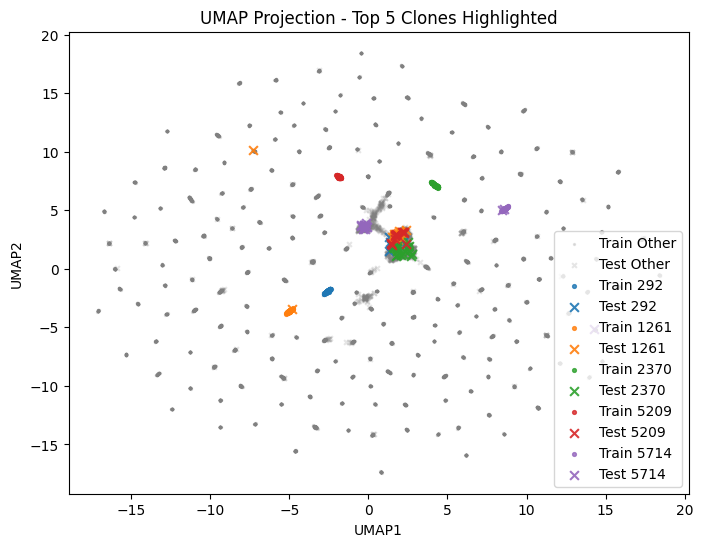

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def plot_umap(adata, colormap="tab10"):
    """
    Plots UMAP with:
    - Top 5 clones in distinct colors (plotted on top)
    - Other clones in gray with lower opacity
    - Train cells as dots, Test cells as crosses
    - Larger marker size for top 5 clones
    """
    umap_coords = adata.obsm["X_umap"]

    # Extract train and test indices
    train_idx = adata.obs["dataset"] == "train"
    test_idx = adata.obs["dataset"] == "test"

    # Get unique clone groups
    unique_clones = adata.obs["clone_group"].cat.categories

    # Define a colormap for the top 5 clones, others in gray
    colors = plt.get_cmap(colormap)(range(len(unique_clones) - 1))  # Leave space for gray
    color_map = dict(zip(unique_clones[:-1], colors))  # Map top 5 clones
    color_map["Other"] = "gray"  # Set 'Other' to gray

    plt.figure(figsize=(8, 6))

    # **Step 1**: Plot "Other" cells first (background with low opacity)
    idx_train_other = (adata.obs["clone_group"] == "Other") & train_idx
    idx_test_other = (adata.obs["clone_group"] == "Other") & test_idx

    plt.scatter(umap_coords[idx_train_other, 0], umap_coords[idx_train_other, 1], 
                color=color_map["Other"], s=8, marker=".", alpha=0.2, label="Train Other")  # Lower opacity

    plt.scatter(umap_coords[idx_test_other, 0], umap_coords[idx_test_other, 1], 
                color=color_map["Other"], s=12, marker="x", alpha=0.2, label="Test Other")  # Lower opacity

    # **Step 2**: Plot top 5 clones on top (larger size)
    for clone in unique_clones[:-1]:  # Skip "Other"
        idx_train = (adata.obs["clone_group"] == clone) & train_idx
        idx_test = (adata.obs["clone_group"] == clone) & test_idx

        # Train: Dots
        plt.scatter(umap_coords[idx_train, 0], umap_coords[idx_train, 1], 
                    color=color_map[clone], s=30, marker=".", alpha=0.8, label=f"Train {clone}")  # Bigger size

        # Test: Crosses
        plt.scatter(umap_coords[idx_test, 0], umap_coords[idx_test, 1], 
                    color=color_map[clone], s=40, marker="x", alpha=0.9, label=f"Test {clone}")  # Bigger size

    plt.xlabel("UMAP1")
    plt.ylabel("UMAP2")
    plt.title("UMAP Projection - Top 5 Clones Highlighted")
    plt.legend()
    plt.show()

# Run the function to plot
plot_umap(adata)

### Train 

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def plot_umap_with_lineages(adata, n_top_lineages=5, colormap="tab10"):
    """
    Plots UMAP from `adata.obsm["X_umap"]` with:
    - Top N clones in distinct colors (plotted on top)
    - Other clones in gray with lower opacity
    - Train cells as dots, Test cells as crosses
    
    Parameters:
    - adata (AnnData): AnnData object with precomputed UMAP in `.obsm["X_umap"]`
    - n_top_lineages (int): Number of largest lineages to highlight in the plot
    - colormap (str): Matplotlib colormap for the distinct top N lineages
    
    Output:
    - A UMAP scatter plot (does NOT modify `adata`)
    """

    ### **1️⃣ Check If Required Fields Exist**
    if "X_umap" not in adata.obsm:
        raise ValueError("UMAP coordinates missing! Ensure `adata.obsm['X_umap']` is computed.")
    
    if "LCL_embedding_semi_10" not in adata.obsm:
        raise ValueError("Contrastive learning embeddings missing! Ensure `adata.obsm['LCL_embedding_dim10']` exists.")
    
    if "clone_id" not in adata.obs:
        raise ValueError("Clone ID column missing! Ensure `adata.obs['clone_id']` exists.")
    
    if "dataset" not in adata.obs:
        raise ValueError("Dataset column missing! Ensure `adata.obs['dataset']` exists with 'train' and 'test' values.")

    ### **2️⃣ Identify the Top N Largest Lineages**
    print(f"Identifying the top {n_top_lineages} largest lineages...")
    clone_counts = adata.obs["clone_id"].value_counts()
    top_n_clones = clone_counts.index[:n_top_lineages]

    # Assign "Other" to all but the top N lineages
    adata.obs["clone_group"] = adata.obs["clone_id"].apply(lambda x: x if x in top_n_clones else "Other")
    
    # Convert to categorical for easy plotting
    adata.obs["clone_group"] = adata.obs["clone_group"].astype("category")

    ### **3️⃣ Plot UMAP with Custom Formatting**
    print("Plotting UMAP with lineage-specific colors and train/test markers...")

    umap_coords = adata.obsm["X_umap"]
    train_idx = adata.obs["dataset"] == "train"
    test_idx = adata.obs["dataset"] == "test"
    
    unique_clones = adata.obs["clone_group"].cat.categories

    # Define a colormap for the top N clones, others in gray
    colors = plt.get_cmap(colormap)(range(len(unique_clones) - 1))  # Leave space for gray
    color_map = dict(zip(unique_clones[:-1], colors))  # Map top N clones
    color_map["Other"] = "gray"  # Set 'Other' to gray

    plt.figure(figsize=(8, 6))

    # **Step 1**: Plot "Other" cells first (background with low opacity)
    idx_train_other = (adata.obs["clone_group"] == "Other") & train_idx
    idx_test_other = (adata.obs["clone_group"] == "Other") & test_idx

    plt.scatter(umap_coords[idx_train_other, 0], umap_coords[idx_train_other, 1], 
                color=color_map["Other"], s=8, marker=".", alpha=0.2, label="Train Other")

    plt.scatter(umap_coords[idx_test_other, 0], umap_coords[idx_test_other, 1], 
                color=color_map["Other"], s=8, marker="x", alpha=0.2, label="Test Other")

    # **Step 2**: Plot top N clones on top (larger size)
    for clone in unique_clones[:-1]:  # Skip "Other"
        idx_train = (adata.obs["clone_group"] == clone) & train_idx
        idx_test = (adata.obs["clone_group"] == clone) & test_idx

        # Train: Dots
        plt.scatter(umap_coords[idx_train, 0], umap_coords[idx_train, 1], 
                    color=color_map[clone], s=40, marker=".", alpha=0.8, label=f"Train {clone}")

        # Test: Crosses
        plt.scatter(umap_coords[idx_test, 0], umap_coords[idx_test, 1], 
                    color=color_map[clone], s=40, marker="x", alpha=1, label=f"Test {clone}")

    plt.xlabel("UMAP1")
    plt.ylabel("UMAP2")
    plt.title(f"UMAP Projection - Top {n_top_lineages} Clones Highlighted")
    plt.legend()
    plt.show()

Identifying the top 1 largest lineages...
Plotting UMAP with lineage-specific colors and train/test markers...


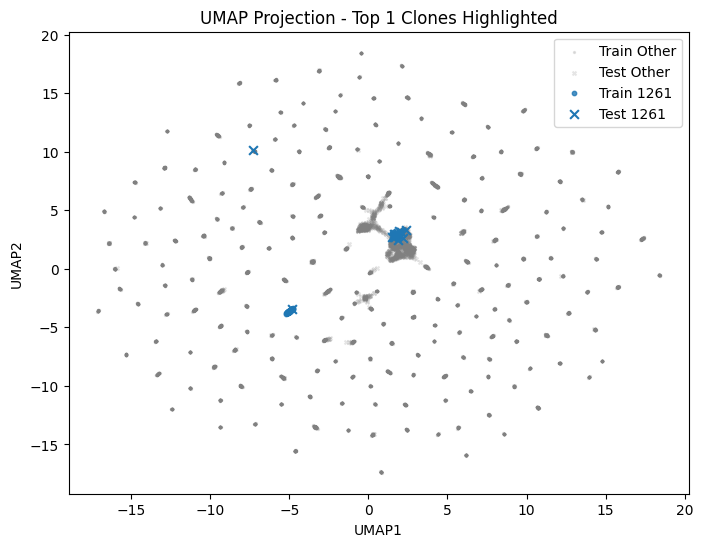

In [13]:
plot_umap_with_lineages(adata, n_top_lineages=1)

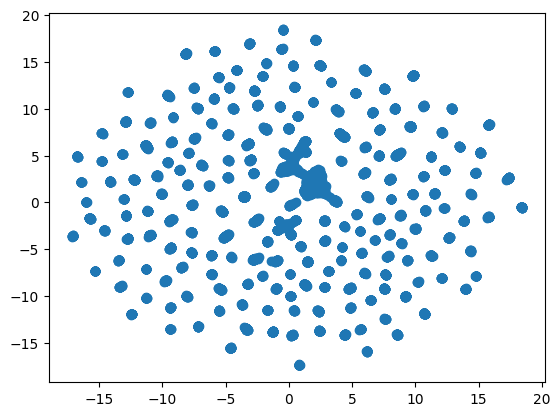

In [14]:
import matplotlib.pyplot as plt
plt.scatter(embedding_umap[:,0],embedding_umap[:,1])

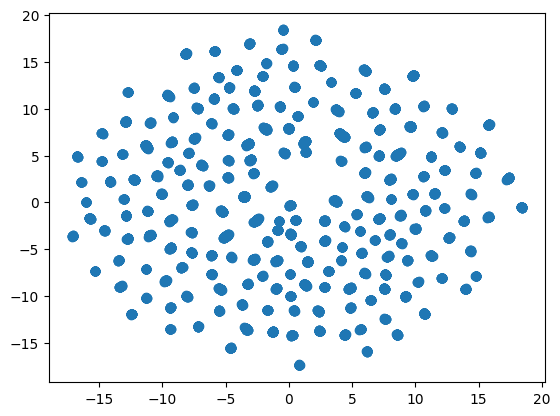

In [15]:
plt.scatter(embedding_umap[:10147,0],embedding_umap[:10147,1])

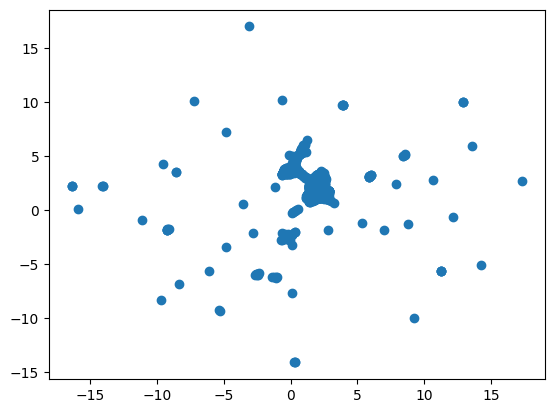

In [16]:
plt.scatter(embedding_umap[10148:,0],embedding_umap[10148:,1])

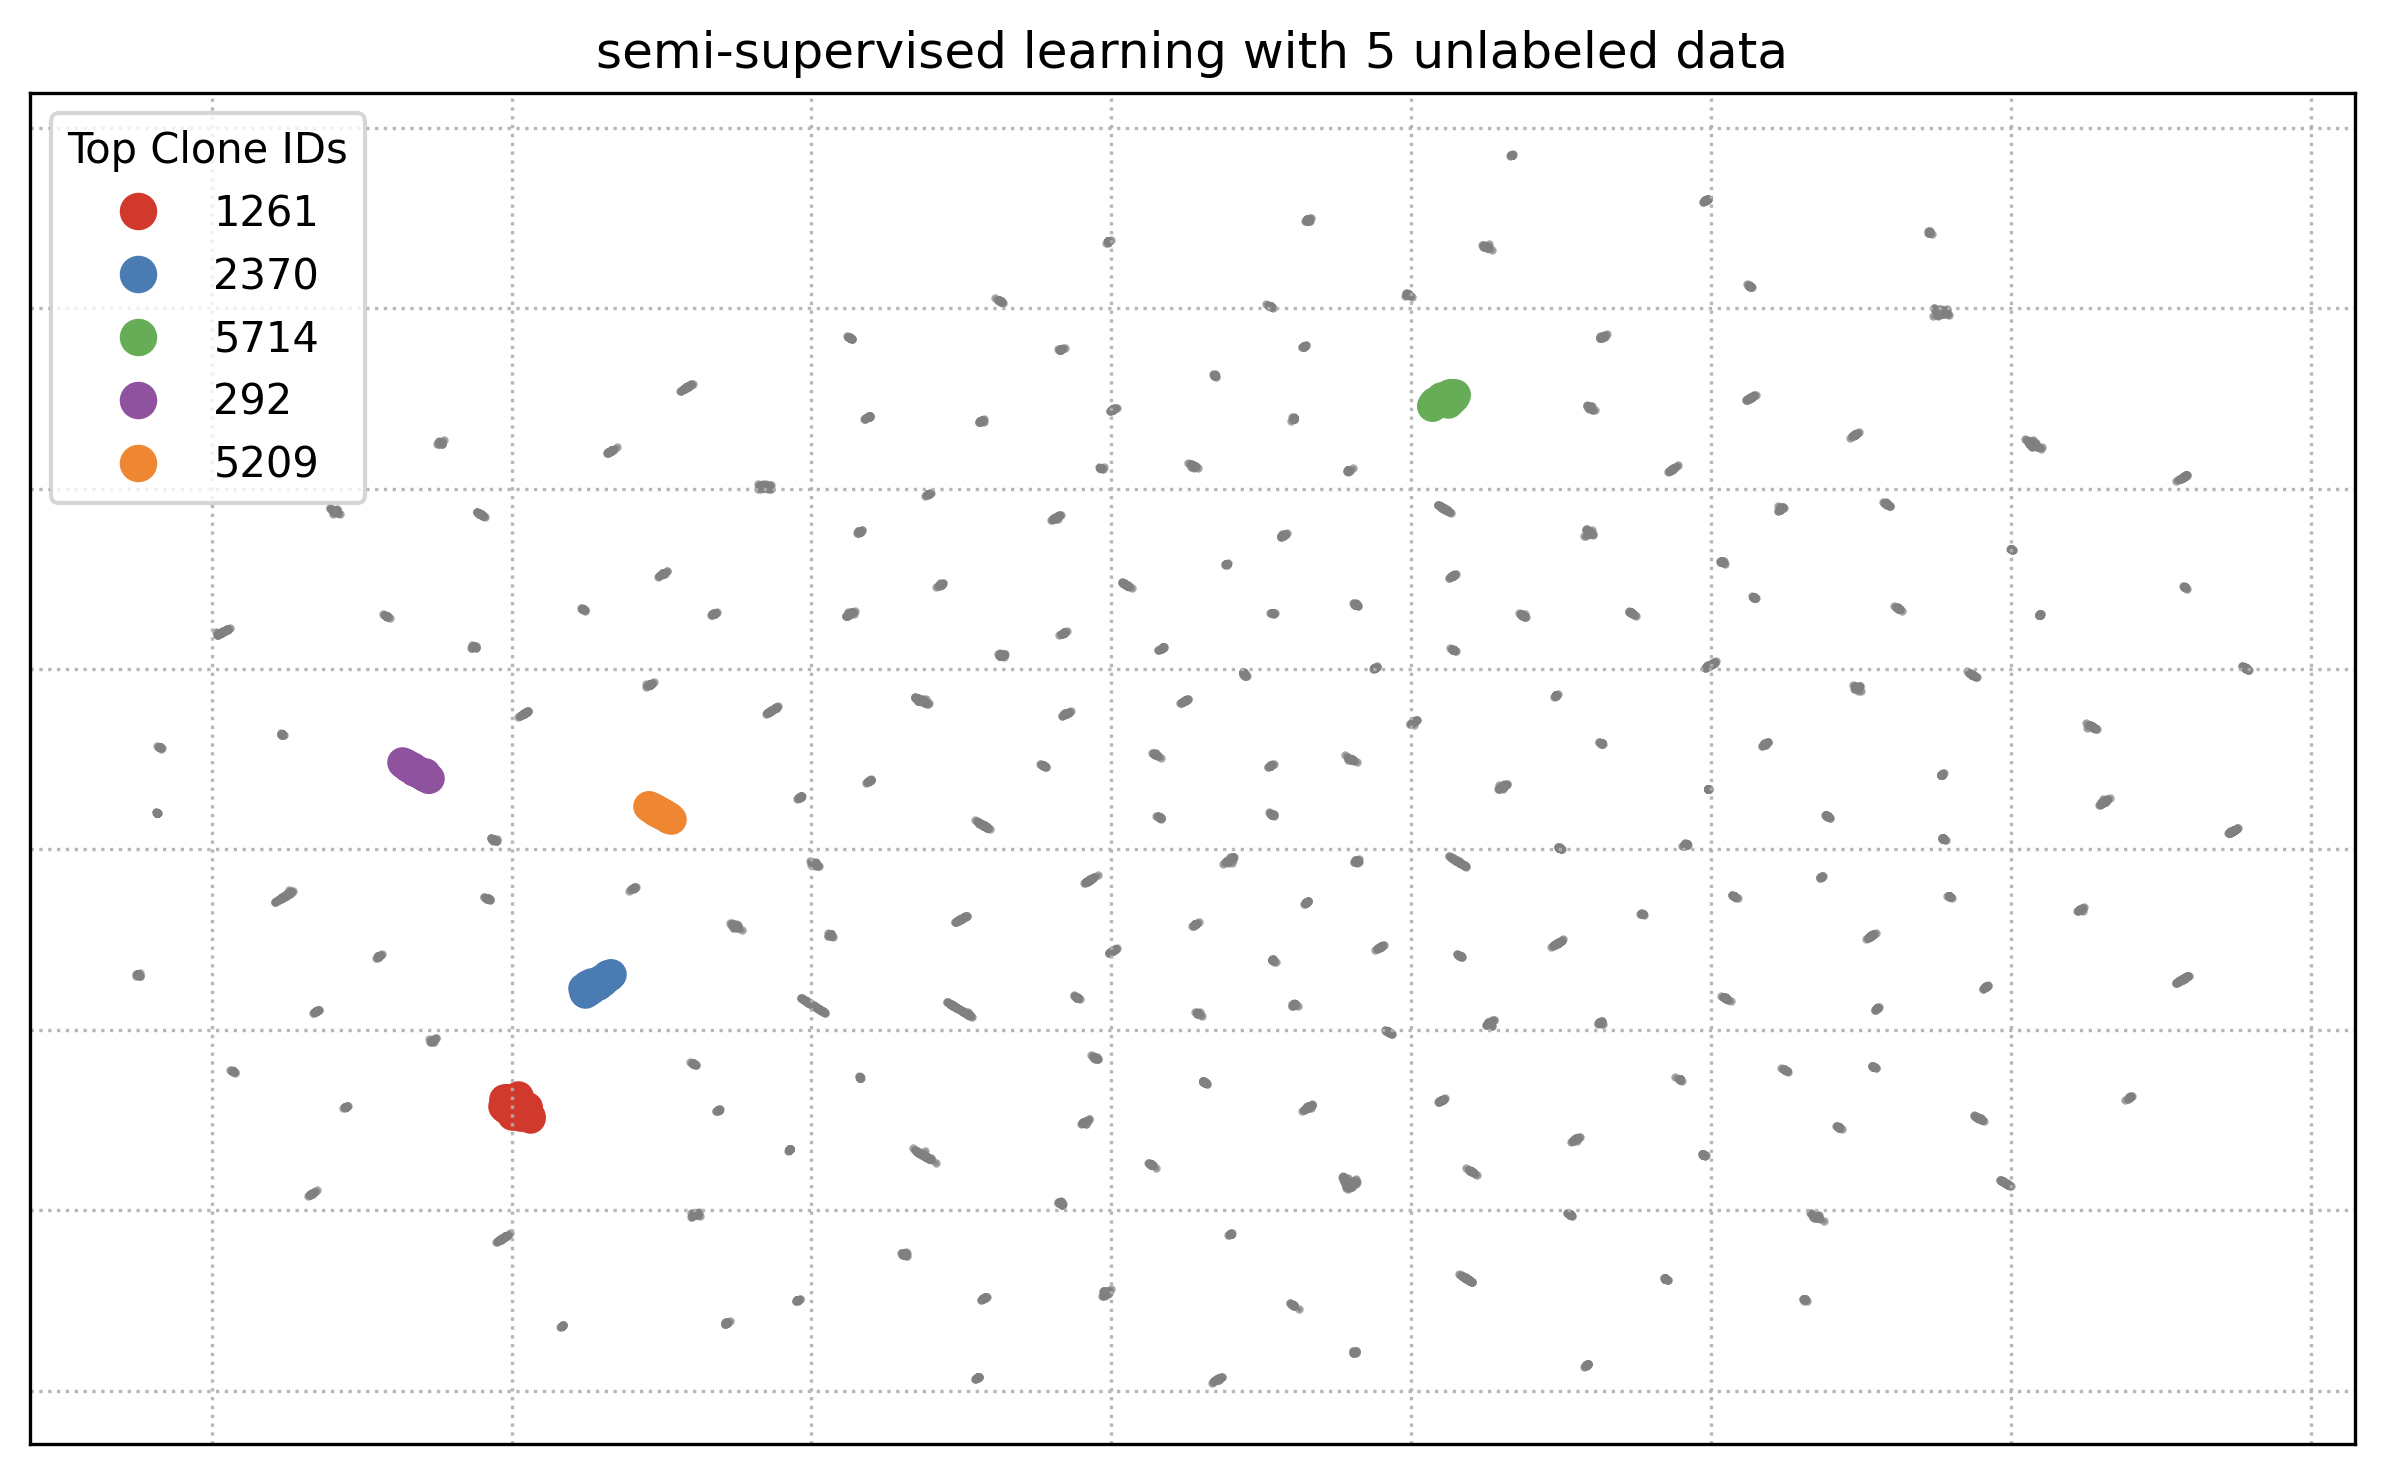

KNN classifier training accuracy: 99.46%
Calinski-Harabasz Score: 16060.92491625275


In [17]:
eval_semi_10_train = LCL_eval.Eval(train_semi_10, adata_train)
eval_semi_10_train.plot_umap_top_lin("semi-supervised learning with 5 unlabeled data")
eval_semi_10_train.KNN_train()
score_10_train = eval_semi_10_train.calculate_calinski_harabasz_score()

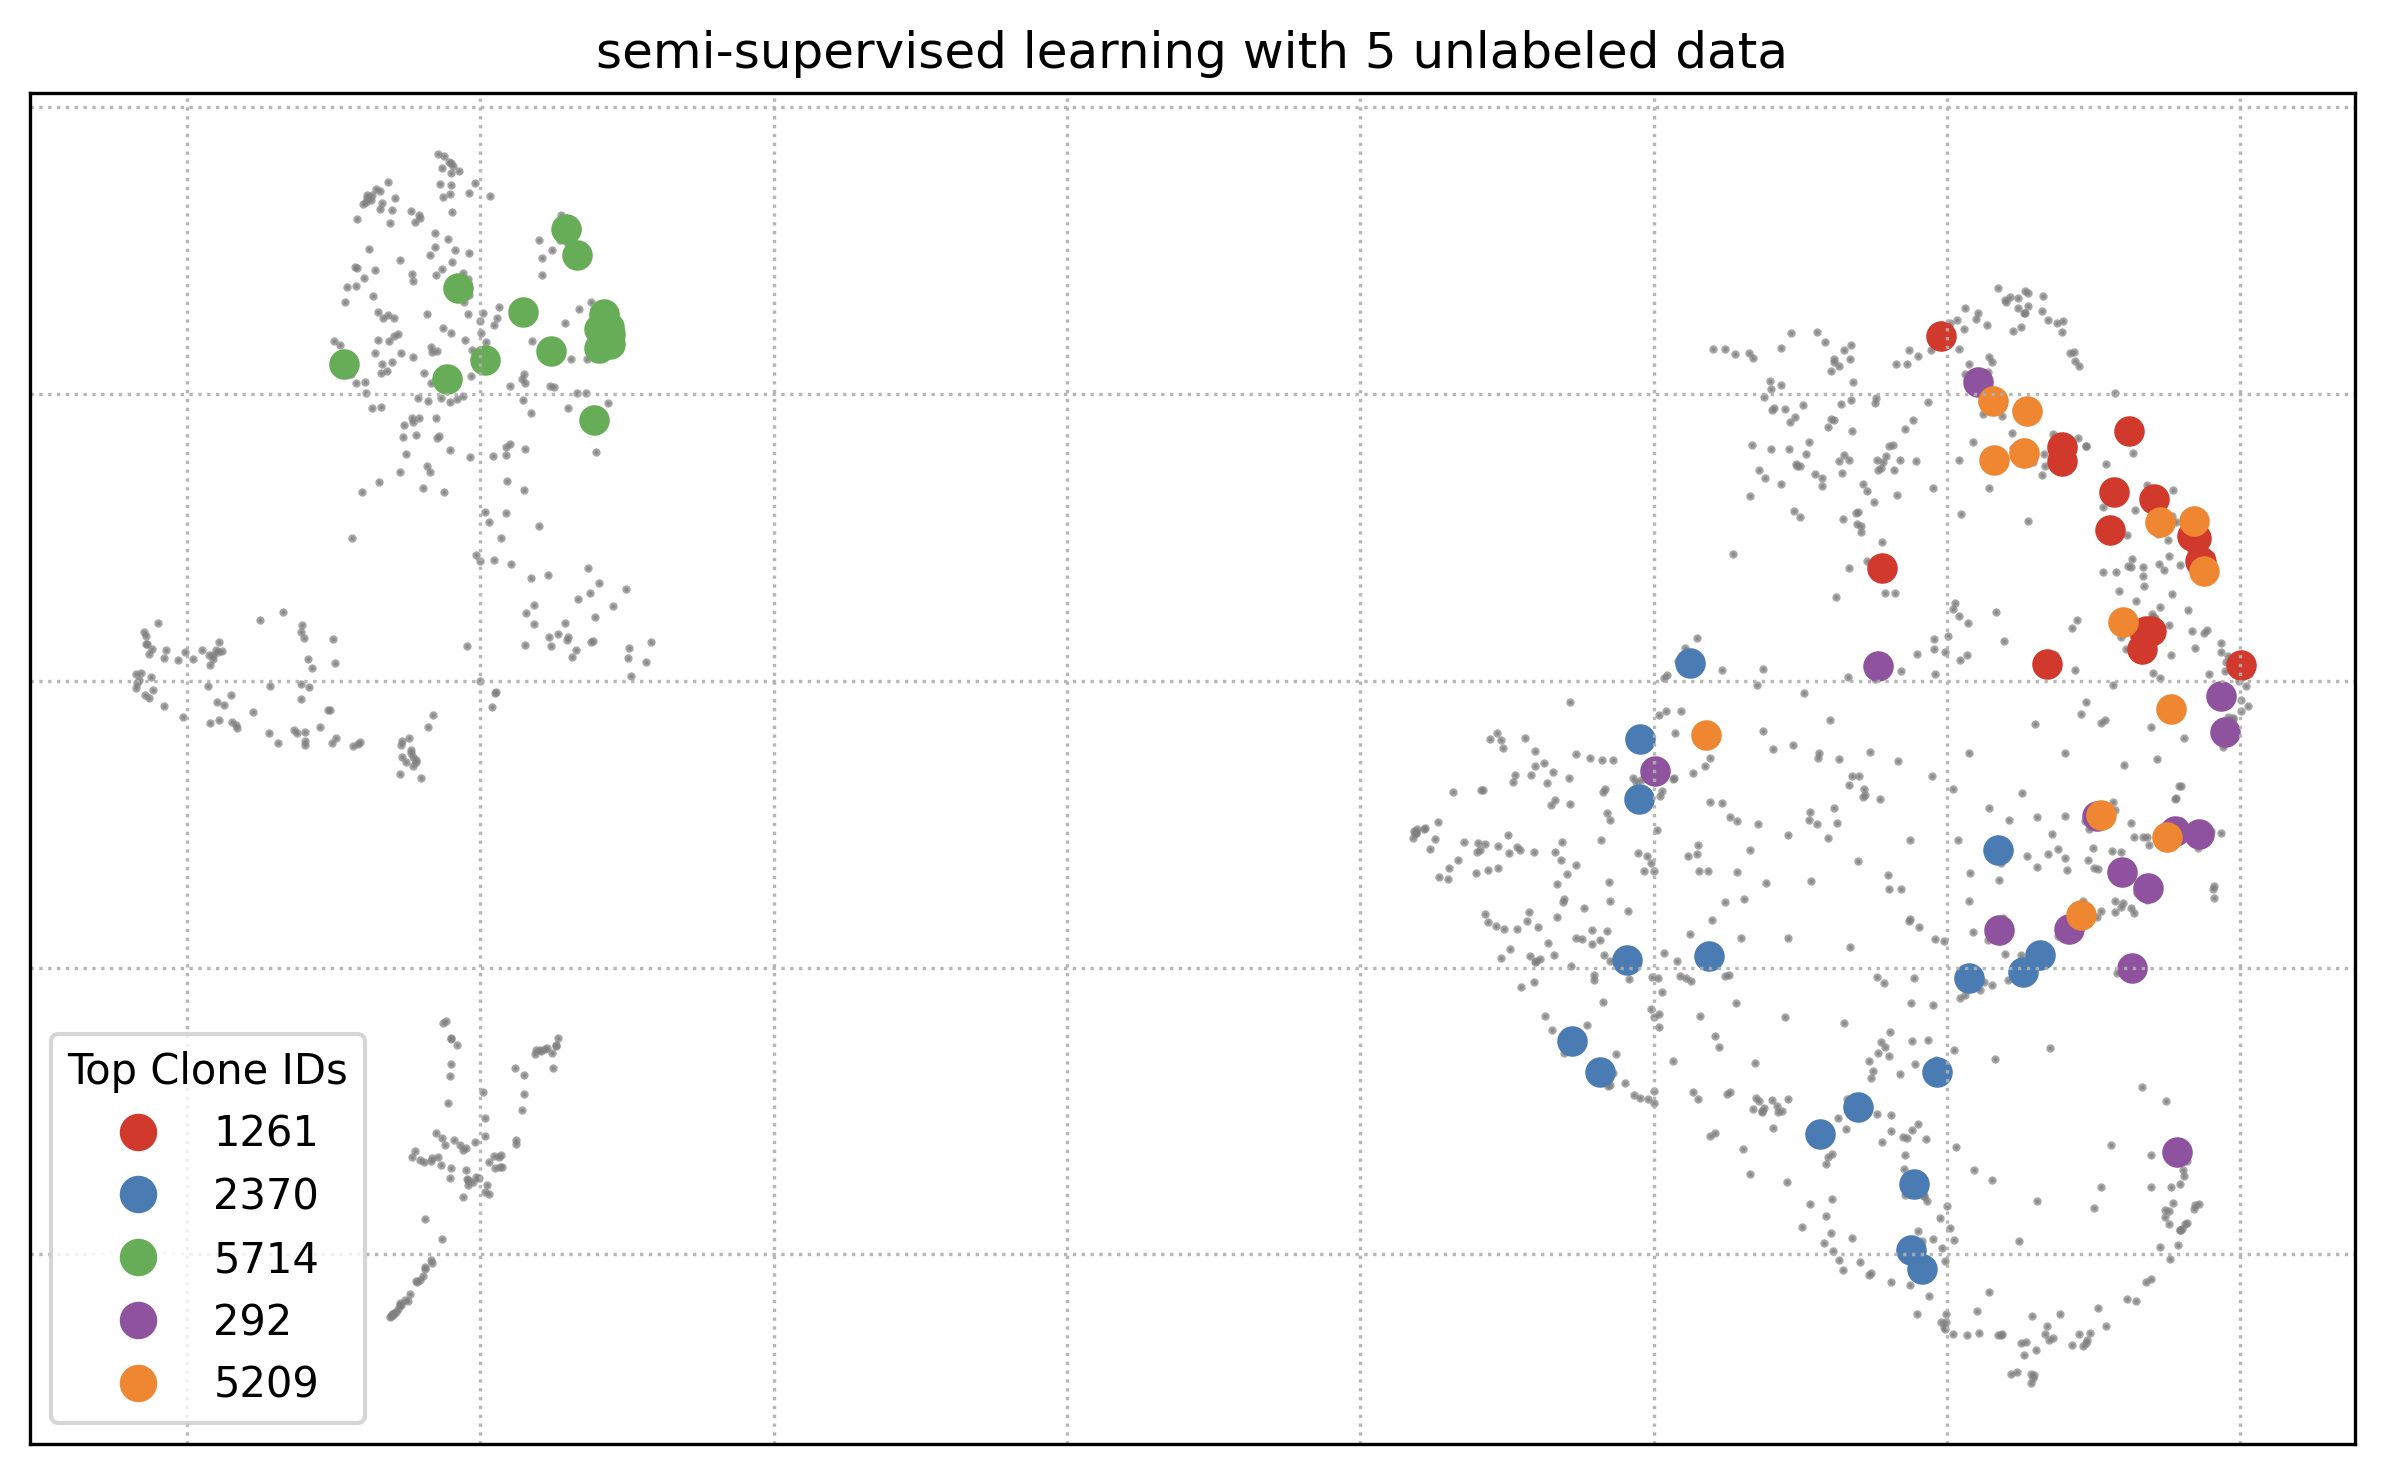

Calinski-Harabasz Score: 8.18817262711302
KNN classifier testing accuracy: 15.35%


0.15346938775510205

In [18]:
eval_semi_10_test = LCL_eval.Eval(test_semi_10, adata_test)
eval_semi_10_test.plot_umap_top_lin("semi-supervised learning with 5 unlabeled data")
score_semi_10_test = eval_semi_10_test.calculate_calinski_harabasz_score()
eval_semi_10_train.KNN_test(test_semi_10, adata_test)